In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

%run ../load_magic/storage.py
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# textures_dir = '../data/1.15_Default_Resource_Pack/assets/minecraft/textures/block'
textures_dir = '../data/1.18.1_Default_Resource_Pack/assets/minecraft/textures/block'
s = Storage()


----

In [3]:

def get_patches(textures_dir, file_name, average_dict, dominant_dict, weighted_dict, n_colors=5):

    # Read the image
    file_path = os.path.join(textures_dir, file_name)
    img_array = io.imread(file_path)[:, :, :3]

    # Calculate the mean of each chromatic channel
    average = average_dict[file_name]
    avg_patch = np.ones(shape=img_array.shape, dtype=np.uint8)*np.uint8(average)

    # Create a palette with the most representative colors
    pixels = np.float32(img_array.reshape(-1, 3))

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)

    # Get the palette color which occurs most frequently
    dominant = dominant_dict[file_name]
    dom_patch = np.ones(shape=img_array.shape, dtype=np.uint8)*np.uint8(dominant)

    indices = np.argsort(counts)[::-1]
    freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
    rows = np.int_(img_array.shape[0]*freqs)
    
    palette_patch = np.zeros(shape=img_array.shape, dtype=np.uint8)
    for i in range(len(rows) - 1):
        palette_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

    # Calculate the mean of the palette patch
    weighted_average = weighted_dict[file_name]
    weighted_avg_patch = np.ones(shape=img_array.shape, dtype=np.uint8)*np.uint8(weighted_average)
    
    return img_array, avg_patch, dom_patch, palette_patch, weighted_avg_patch

In [4]:

def show_images(file_name, img_array, avg_patch, dom_patch, palette_patch, weighted_avg_patch):
    fig, (original_ax, average_ax, palette_ax, dominant_ax,
          weighted_avg_ax) = plt.subplots(1, 5, figsize=(12, 6))
    original_ax.imshow(img_array)
    original_ax.set_title('Original texture')
    original_ax.axis('off')
    average_ax.imshow(avg_patch)
    average_ax.set_title('Average color')
    average_ax.axis('off')
    palette_ax.imshow(palette_patch)
    palette_ax.set_title('Color palette')
    palette_ax.axis('off')
    dominant_ax.imshow(dom_patch)
    dominant_ax.set_title('Dominant color')
    dominant_ax.axis('off')
    weighted_avg_ax.imshow(weighted_avg_patch)
    weighted_avg_ax.set_title('Weighted average')
    weighted_avg_ax.axis('off')
    
    # Photometric/digital ITU BT.709 RGB -> Luma conversion formula
    red_value = int(dom_patch[0][0][0])
    green_value = int(dom_patch[0][0][1])
    blue_value = int(dom_patch[0][0][2])
    luminance = 0.2126*red_value + 0.7152*green_value + 0.0722*blue_value
    
    block_name = file_name.split('.')[0].replace('_', ' ').title()
    plt.suptitle(block_name + f' (Luminance: {luminance:.1f})', y=0.75)
    plt.show(fig)
    
    return (luminance, file_name)


----

In [5]:

if s.pickle_exists('minecraft_blocks_list'):
    blocks_list = s.load_object('minecraft_blocks_list')
else:
    blocks_list = ['acacia_log.png', 'acacia_log_top.png', 'acacia_planks.png',
                   'andesite.png', 'birch_log.png', 'birch_log_top.png',
                   'birch_planks.png', 'black_concrete.png', 'black_concrete_powder.png',
                   'black_glazed_terracotta.png', 'black_terracotta.png', 'black_wool.png',
                   'blue_concrete.png', 'blue_concrete_powder.png', 'blue_glazed_terracotta.png',
                   'blue_terracotta.png', 'blue_wool.png', 'bone_block_side.png',
                   'bone_block_top.png', 'bookshelf.png', 'bricks.png',
                   'brown_concrete.png', 'brown_concrete_powder.png', 'brown_glazed_terracotta.png',
                   'brown_terracotta.png', 'brown_wool.png', 'chiseled_nether_bricks.png',
                   'chiseled_quartz_block.png', 'chiseled_quartz_block_top.png',
                   'chiseled_red_sandstone.png',
                   'chiseled_sandstone.png', 'chiseled_stone_bricks.png', 'coal_block.png',
                   'coal_ore.png', 'cobblestone.png', 'cracked_nether_bricks.png',
                   'cracked_stone_bricks.png', 'cyan_concrete.png', 'cyan_concrete_powder.png',
                   'cyan_glazed_terracotta.png', 'cyan_terracotta.png', 'cyan_wool.png',
                   'dark_oak_log.png', 'dark_oak_log_top.png', 'dark_oak_planks.png',
                   'dark_prismarine.png', 'diamond_block.png', 'diorite.png',
                   'dirt.png', 'emerald_block.png', 'end_stone.png',
                   'end_stone_bricks.png', 'furnace_front.png', 'furnace_side.png',
                   'furnace_top.png', 'granite.png', 'grass_block_side.png',
                   'gravel.png', 'gray_concrete.png', 'gray_concrete_powder.png',
                   'gray_glazed_terracotta.png', 'gray_terracotta.png', 'gray_wool.png',
                   'green_concrete.png', 'green_concrete_powder.png',
                   'green_glazed_terracotta.png',
                   'green_terracotta.png', 'green_wool.png', 'hay_block_side.png',
                   'hay_block_top.png', 'iron_block.png', 'iron_ore.png',
                   'jack_o_lantern.png', 'jungle_log.png', 'jungle_log_top.png',
                   'jungle_planks.png', 'lapis_block.png', 'light_blue_concrete.png',
                   'light_blue_concrete_powder.png', 'light_blue_glazed_terracotta.png',
                   'light_blue_terracotta.png',
                   'light_blue_wool.png', 'light_gray_concrete.png',
                   'light_gray_concrete_powder.png',
                   'light_gray_glazed_terracotta.png', 'light_gray_terracotta.png',
                   'light_gray_wool.png',
                   'lime_concrete.png', 'lime_concrete_powder.png', 'lime_glazed_terracotta.png',
                   'lime_terracotta.png', 'lime_wool.png', 'magenta_concrete.png',
                   'magenta_concrete_powder.png', 'magenta_glazed_terracotta.png',
                   'magenta_terracotta.png',
                   'magenta_wool.png', 'melon_side.png', 'melon_top.png',
                   'mossy_cobblestone.png', 'mossy_stone_bricks.png', 'netherite_block.png',
                   'netherrack.png', 'nether_bricks.png', 'nether_quartz_ore.png',
                   'nether_wart_block.png', 'note_block.png', 'oak_log.png',
                   'oak_log_top.png', 'oak_planks.png', 'orange_concrete.png',
                   'orange_concrete_powder.png', 'orange_glazed_terracotta.png',
                   'orange_terracotta.png',
                   'orange_wool.png', 'packed_ice.png', 'pink_concrete.png',
                   'pink_concrete_powder.png', 'pink_glazed_terracotta.png', 'pink_terracotta.png',
                   'pink_wool.png', 'piston_side.png', 'piston_top.png',
                   'piston_top_sticky.png', 'podzol_side.png', 'polished_andesite.png',
                   'polished_diorite.png', 'polished_granite.png', 'prismarine_bricks.png',
                   'pumpkin_side.png', 'pumpkin_top.png', 'purple_concrete.png',
                   'purple_concrete_powder.png', 'purple_glazed_terracotta.png',
                   'purple_terracotta.png',
                   'purple_wool.png', 'purpur_block.png', 'purpur_pillar.png',
                   'purpur_pillar_top.png', 'quartz_block_side.png', 'quartz_block_top.png',
                   'quartz_bricks.png', 'quartz_pillar.png', 'quartz_pillar_top.png',
                   'redstone_block.png', 'redstone_lamp.png', 'redstone_ore.png',
                   'red_concrete.png', 'red_concrete_powder.png', 'red_glazed_terracotta.png',
                   'red_nether_bricks.png', 'red_sand.png', 'red_sandstone.png',
                   'red_sandstone_top.png', 'red_terracotta.png', 'red_wool.png',
                   'sand.png', 'sandstone.png', 'sandstone_top.png',
                   'slime_block.png', 'smooth_stone.png', 'smooth_stone_slab_side.png',
                   'soul_sand.png', 'sponge.png', 'spruce_log.png',
                   'spruce_log_top.png', 'spruce_planks.png', 'stone.png',
                   'stone_bricks.png', 'terracotta.png', 'wet_sponge.png',
                   'white_concrete.png', 'white_concrete_powder.png', 'white_glazed_terracotta.png',
                   'white_terracotta.png', 'white_wool.png', 'yellow_concrete.png',
                   'yellow_concrete_powder.png', 'yellow_glazed_terracotta.png',
                   'yellow_terracotta.png', 'yellow_wool.png']
    s.store_objects(minecraft_blocks_list=blocks_list)

In [6]:

b = s.pickle_exists('AVERAGE_DICT') and s.pickle_exists('DOMINANT_DICT')
b = b and s.pickle_exists('WEIGHTED_AVERAGE_DICT')
if b:
    AVERAGE_DICT = s.load_object('AVERAGE_DICT')
    DOMINANT_DICT = s.load_object('DOMINANT_DICT')
    WEIGHTED_AVERAGE_DICT = s.load_object('WEIGHTED_AVERAGE_DICT')
else:
    def get_dictionaries(textures_dir, n_colors=5):
        average_dict = {}
        dominant_dict = {}
        weighted_dict = {}
        for file_name in os.listdir(textures_dir):
            if file_name.endswith('.png'):

                # Read the image
                file_path = os.path.join(textures_dir, file_name)
                try:
                    img_array = io.imread(file_path)[:, :, :3]
                    if img_array.shape == (16, 16, 3):

                        # Calculate the mean of each chromatic channel
                        average = img_array.mean(axis=0).mean(axis=0)
                        average_dict[file_name] = tuple(average)

                        # Get the palette color which occurs most frequently
                        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
                        flags = cv2.KMEANS_RANDOM_CENTERS
                        pixels = np.float32(img_array.reshape(-1, 3))
                        _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
                        _, counts = np.unique(labels, return_counts=True)
                        dominant = palette[np.argmax(counts)]
                        dominant_dict[file_name] = tuple(dominant)

                        # Calculate the mean of the palette patch
                        indices = np.argsort(counts)[::-1]   
                        freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
                        rows = np.int_(img_array.shape[0]*freqs)
                        palette_patch = np.zeros(shape=img_array.shape, dtype=np.uint8)
                        for i in range(len(rows) - 1):
                            palette_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
                        weighted_average = palette_patch.mean(axis=0).mean(axis=0)
                        weighted_dict[file_name] = tuple(weighted_average)
                except IndexError as e:
                    print(f'{file_name}: {str(e).strip()}')

        return average_dict, dominant_dict, weighted_dict
    AVERAGE_DICT, DOMINANT_DICT, WEIGHTED_AVERAGE_DICT = get_dictionaries(textures_dir, n_colors=5)
    s.store_objects(AVERAGE_DICT=AVERAGE_DICT, DOMINANT_DICT=DOMINANT_DICT,
                    WEIGHTED_AVERAGE_DICT=WEIGHTED_AVERAGE_DICT)


----

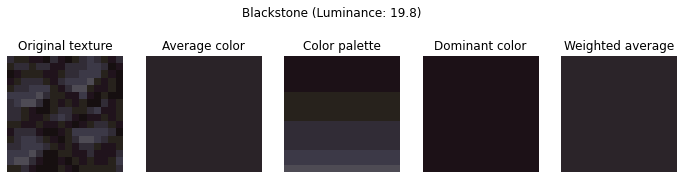

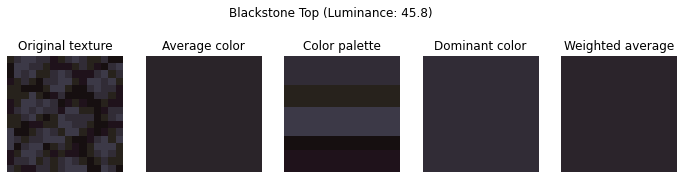

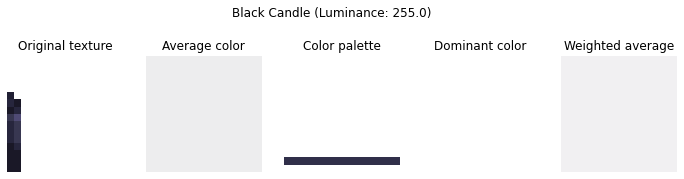

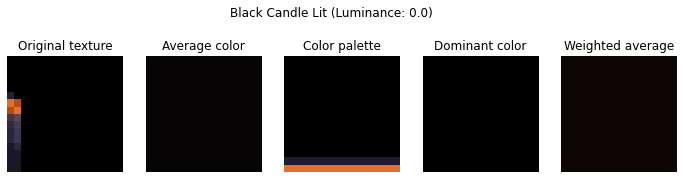

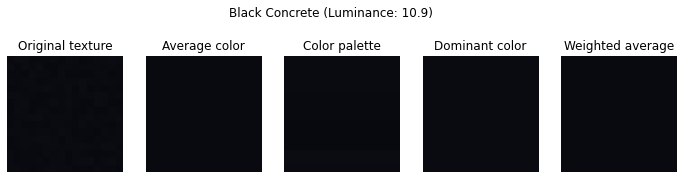

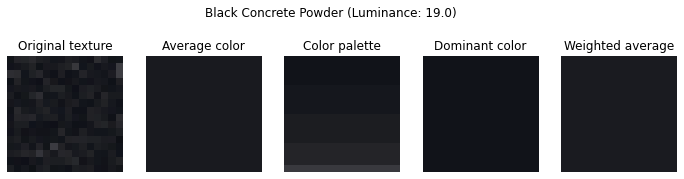

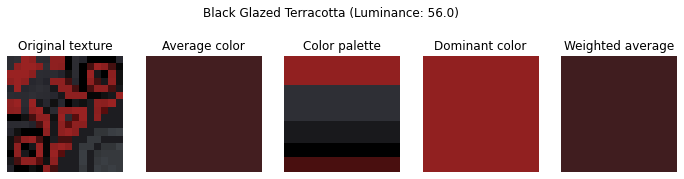

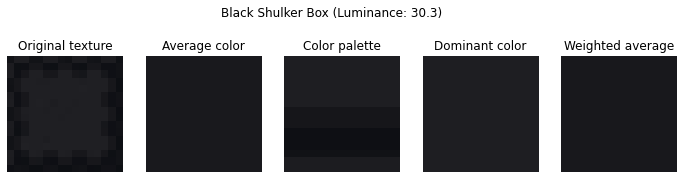

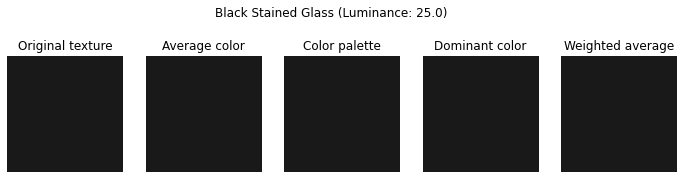

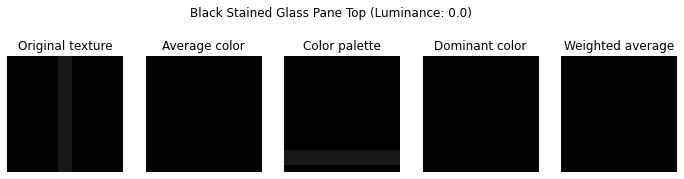

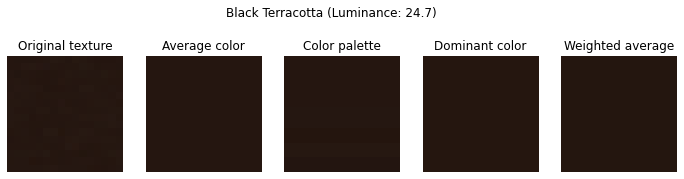

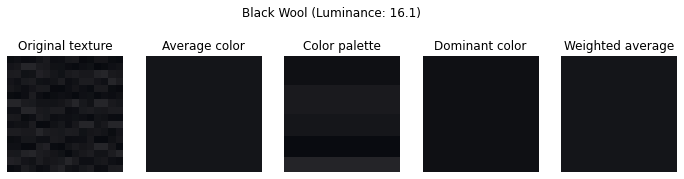

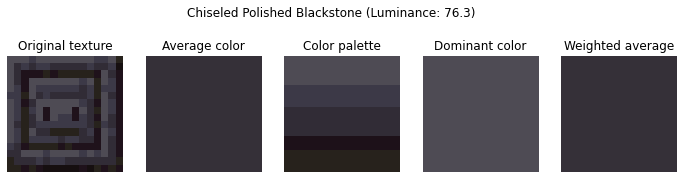

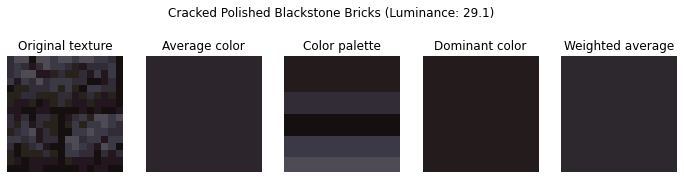

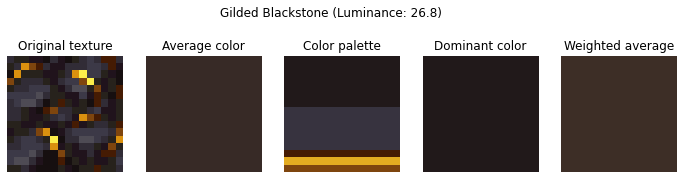

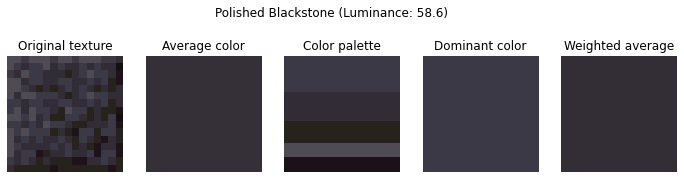

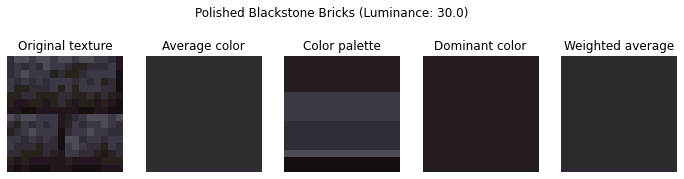

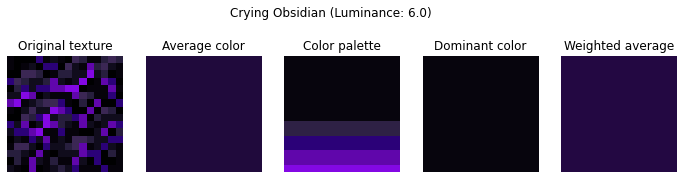

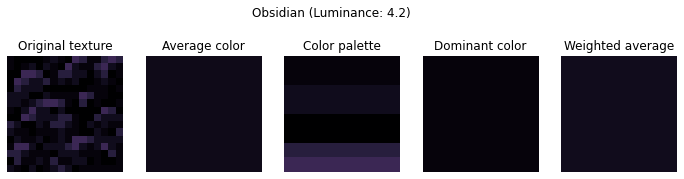

[(0.0, 'black_candle_lit.png'), (0.0, 'black_stained_glass_pane_top.png'), (4.2154, 'obsidian.png'), (6.0028, 'crying_obsidian.png'), (10.9358, 'black_concrete.png'), (16.0762, 'black_wool.png'), (19.008, 'black_concrete_powder.png'), (19.771799999999995, 'blackstone.png'), (24.6836, 'black_terracotta.png'), (25.0, 'black_stained_glass.png'), (26.773, 'gilded_blackstone.png'), (29.0578, 'cracked_polished_blackstone_bricks.png'), (29.985599999999998, 'polished_blackstone_bricks.png'), (30.2888, 'black_shulker_box.png'), (45.785000000000004, 'blackstone_top.png'), (56.0238, 'black_glazed_terracotta.png'), (58.648599999999995, 'polished_blackstone.png'), (76.2876, 'chiseled_polished_blackstone.png'), (254.99999999999997, 'black_candle.png')]


In [7]:

block_tuples_list = []
keys_list = [key for key in WEIGHTED_AVERAGE_DICT.keys() if 'black' in key.lower()]
keys_list += [key for key in WEIGHTED_AVERAGE_DICT.keys() if 'obsidian' in key.lower()]
for file_name in keys_list:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    block_tuple = show_images(file_name, img_array, avg_patch, dom_patch, palette_patch,
                              weighted_avg_patch)
    block_tuples_list.append(block_tuple)
black_blocks_list = [tuple[1] for tuple in sorted(block_tuples_list)]
print(sorted(block_tuples_list))

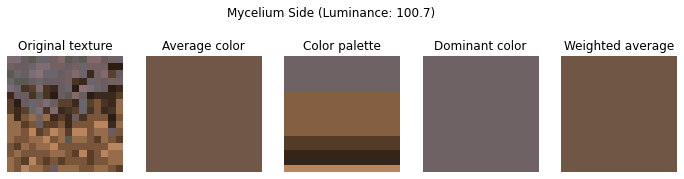

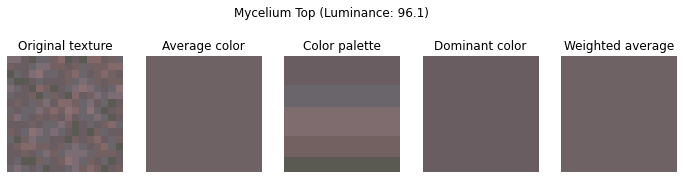

In [9]:

for file_name in [key for key in DOMINANT_DICT.keys() if 'mycelium' in key.lower()]:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    show_images(file_name, img_array, avg_patch, dom_patch, palette_patch, weighted_avg_patch)

In [15]:

[key for key in DOMINANT_DICT.keys() if ('iron' in key.lower())]

['deepslate_iron_ore.png', 'iron_bars.png', 'iron_block.png', 'iron_door_bottom.png', 'iron_door_top.png', 'iron_ore.png', 'iron_trapdoor.png', 'raw_iron_block.png']

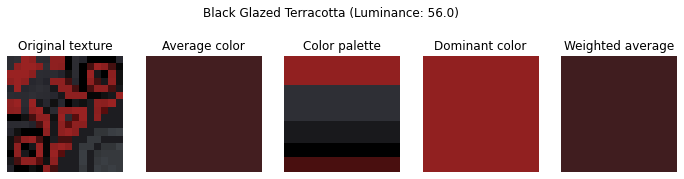

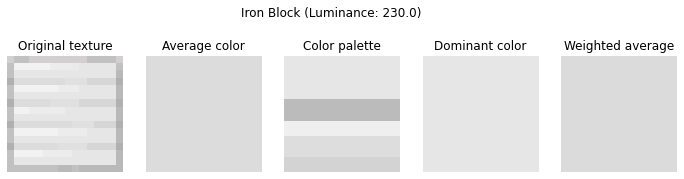

In [16]:

for file_name in ['black_glazed_terracotta.png', 'iron_block.png']:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    show_images(file_name, img_array, avg_patch, dom_patch, palette_patch, weighted_avg_patch)

In [19]:

DOMINANT_DICT['black_glazed_terracotta.png'], DOMINANT_DICT['iron_block.png']

((145.32895, 32.539474, 32.539474), (230.04082, 230.04082, 230.04082))

In [22]:

from PIL import Image
import numpy as np

terracotta_tuple = (145.32895, 32.539474, 32.539474)
iron_tuple = (230.04082, 230.04082, 230.04082)
i = 0
pixels_list = []
for row in range(41):
    cols_list = []
    for col in range(41):
        if i % 2:
            cols_list.append(terracotta_tuple)
        else:
            cols_list.append(iron_tuple)
        i += 1
    pixels_list.append(cols_list)

# Convert the pixels into an array using numpy
array = np.array(pixels_list, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
new_image.save('../saves/png/checkerboard.png')

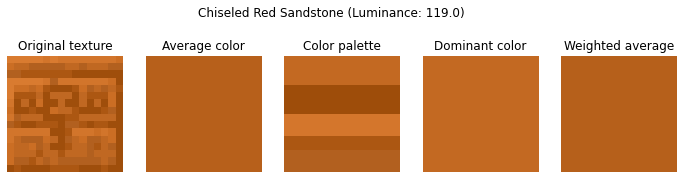

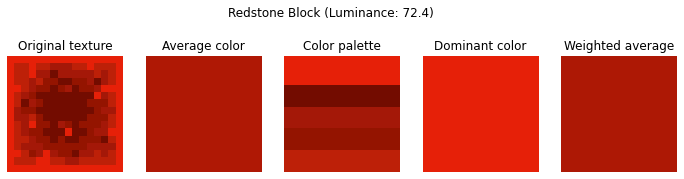

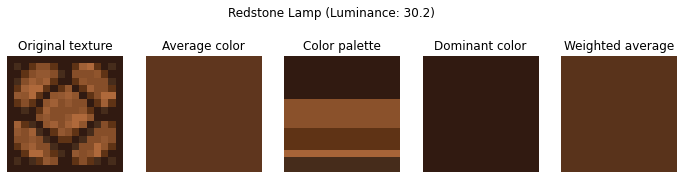

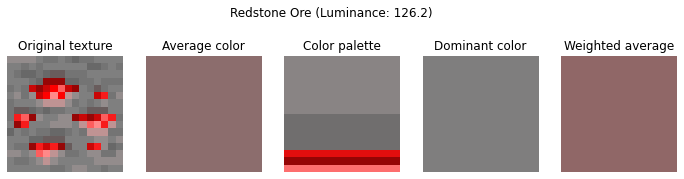

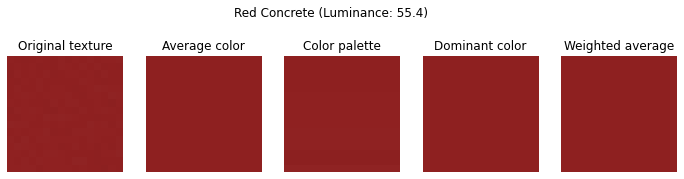

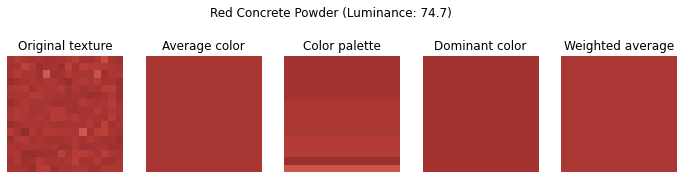

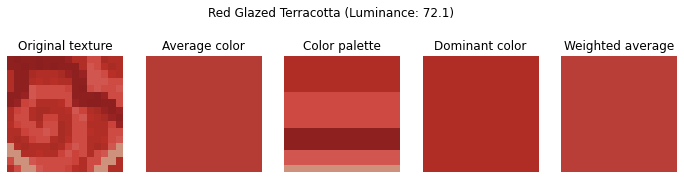

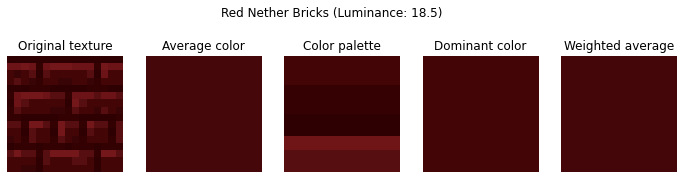

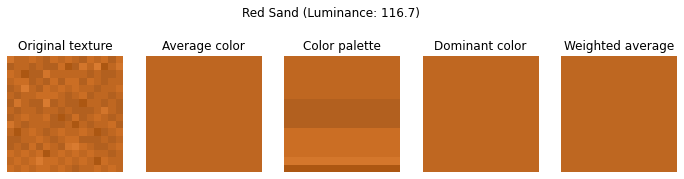

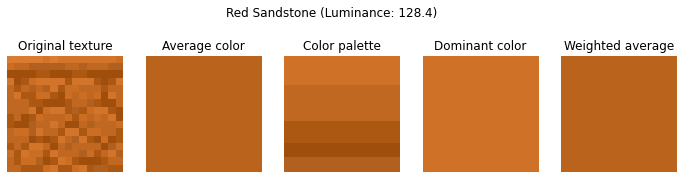

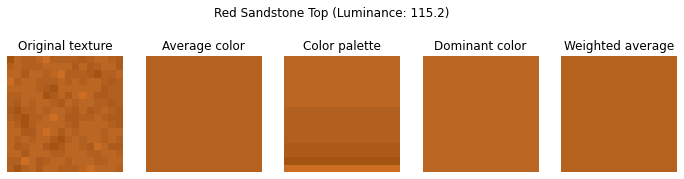

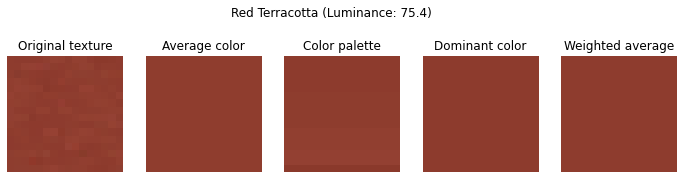

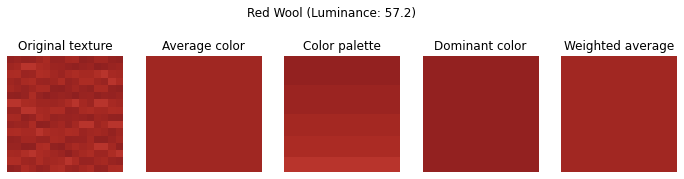

In [7]:

for file_name in [bn for bn in blocks_list if 'red' in bn.lower()]:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    show_images(file_name, img_array, avg_patch, dom_patch, palette_patch, weighted_avg_patch)

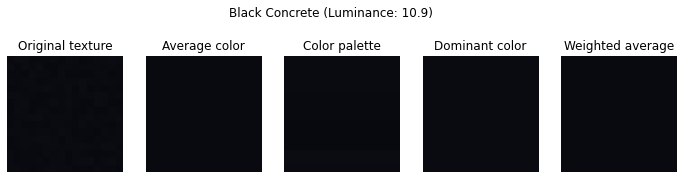

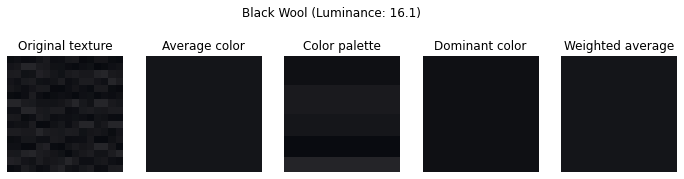

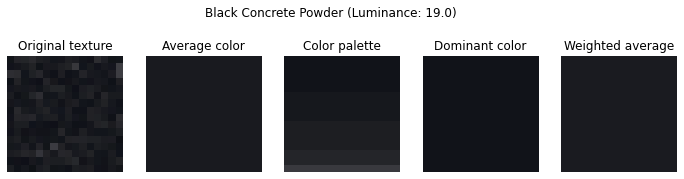

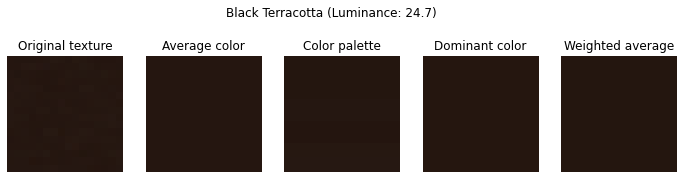

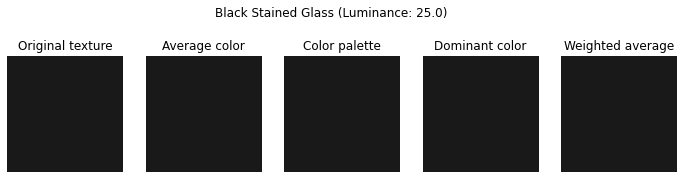

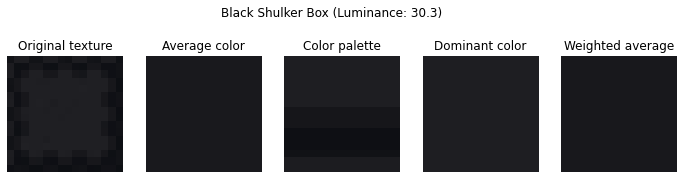

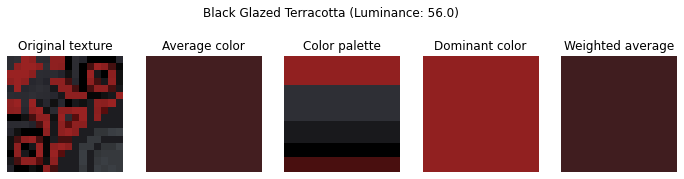

In [9]:

black_blocks_list = ['black_concrete.png', 'black_wool.png', 'black_concrete_powder.png',
                     'black_terracotta.png', 'black_stained_glass.png',
                     'black_shulker_box.png', 'black_glazed_terracotta.png']
for file_name in black_blocks_list:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    block_tuple = show_images(file_name, img_array, avg_patch, dom_patch, palette_patch,
                              weighted_avg_patch)

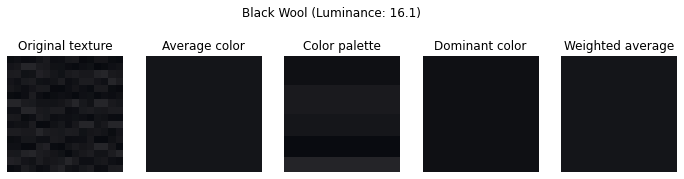

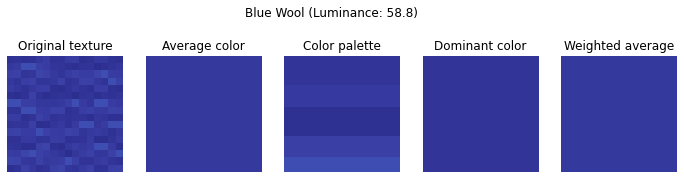

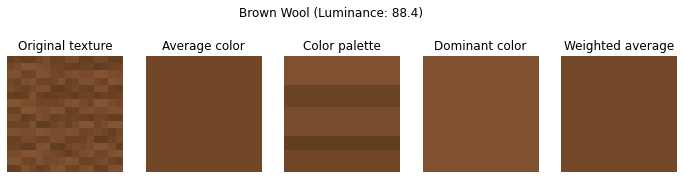

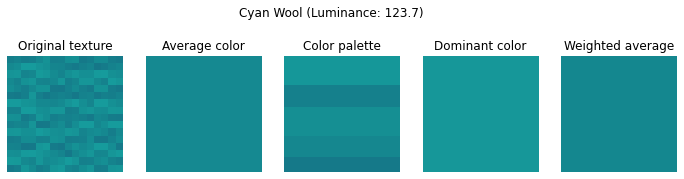

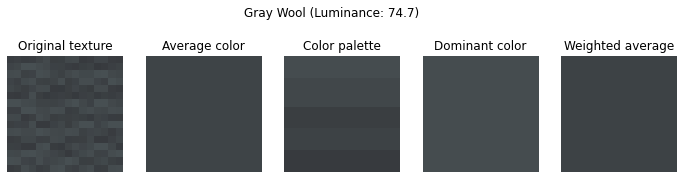

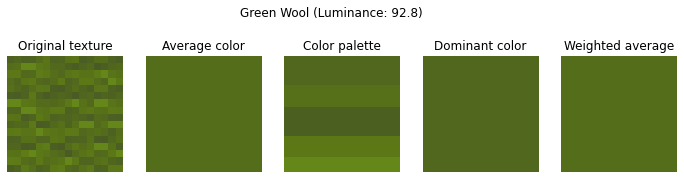

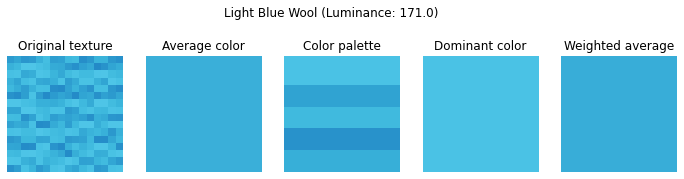

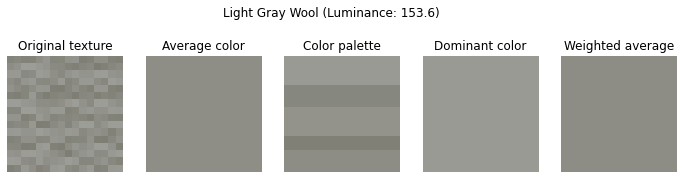

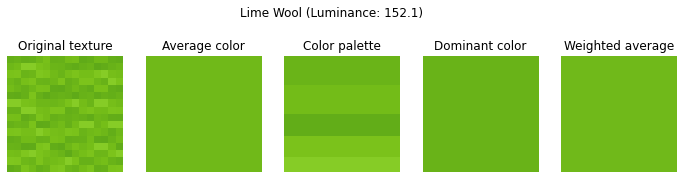

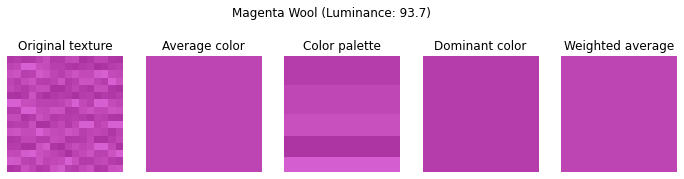

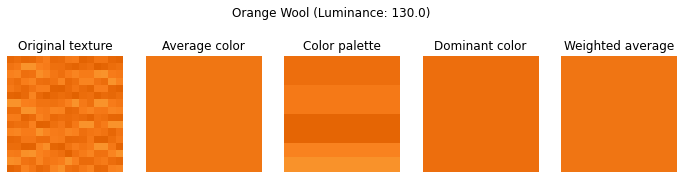

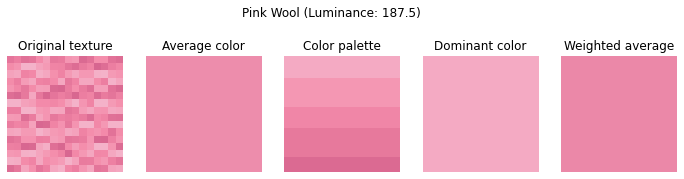

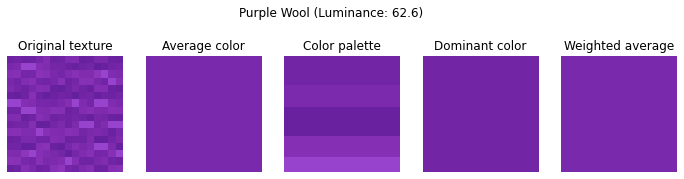

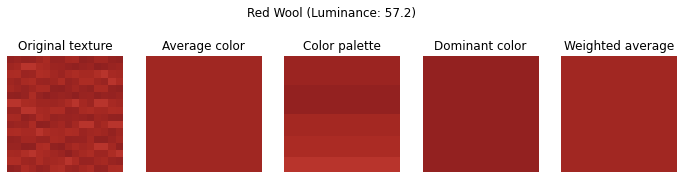

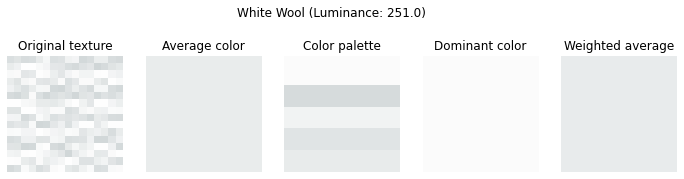

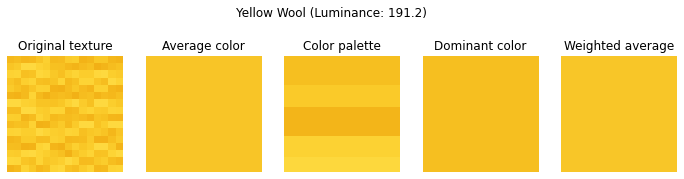

In [10]:

block_tuples_list = []
for file_name in [key for key in WEIGHTED_AVERAGE_DICT.keys() if 'wool' in key.lower()]:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    block_tuple = show_images(file_name, img_array, avg_patch, dom_patch, palette_patch,
                              weighted_avg_patch)
    block_tuples_list.append(block_tuple)
wool_blocks_list = [tuple[1] for tuple in sorted(block_tuples_list)]

['black_wool.png', 'blue_wool.png', 'brown_wool.png', 'cyan_wool.png', 'gray_wool.png', 'green_wool.png', 'light_blue_wool.png', 'light_gray_wool.png', 'lime_wool.png', 'magenta_wool.png', 'orange_wool.png', 'pink_wool.png', 'purple_wool.png', 'red_wool.png', 'white_wool.png', 'yellow_wool.png']


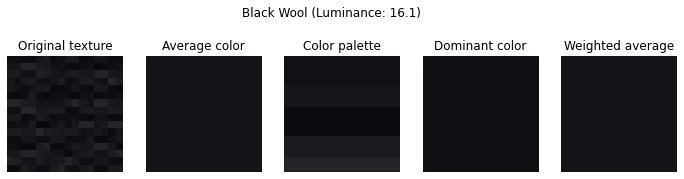

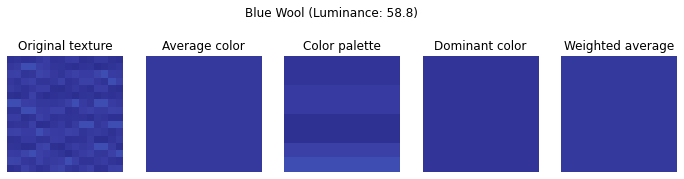

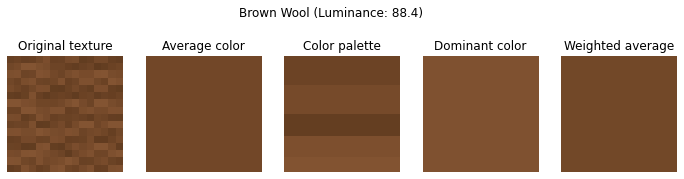

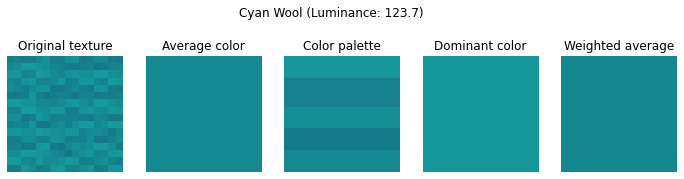

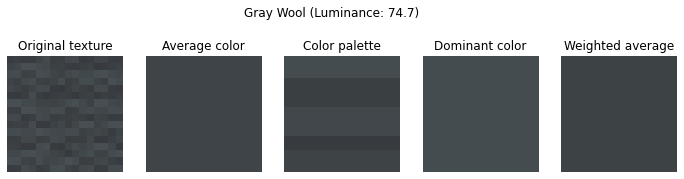

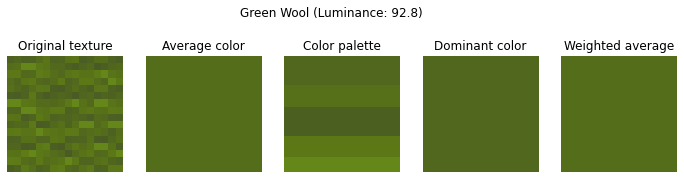

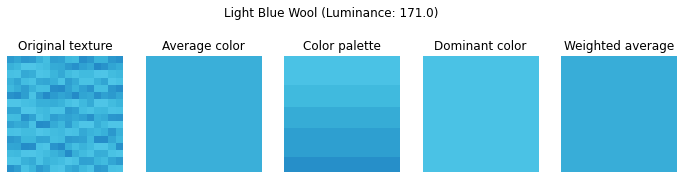

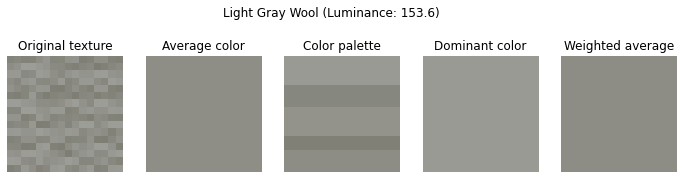

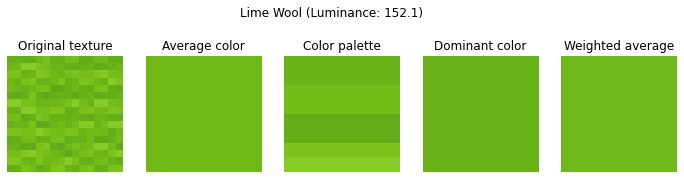

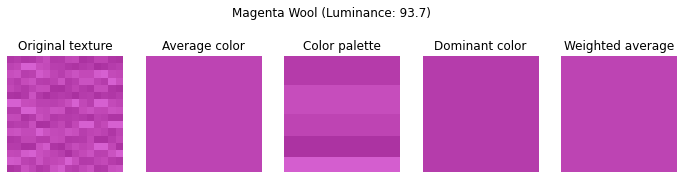

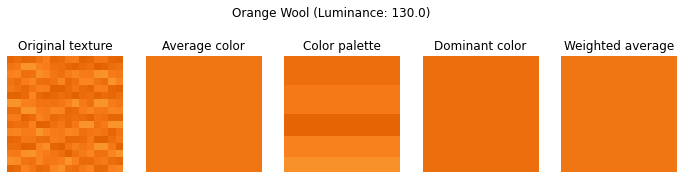

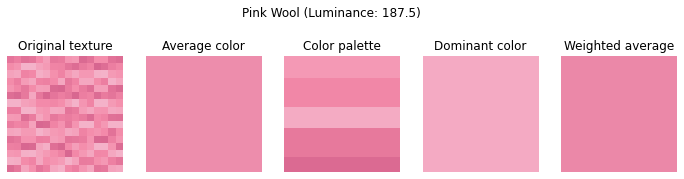

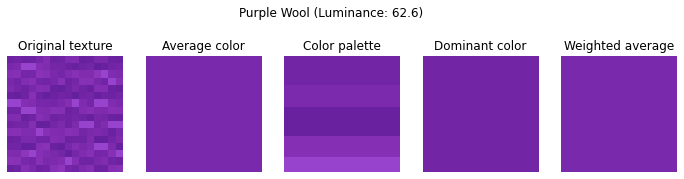

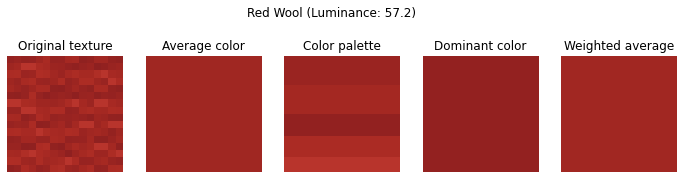

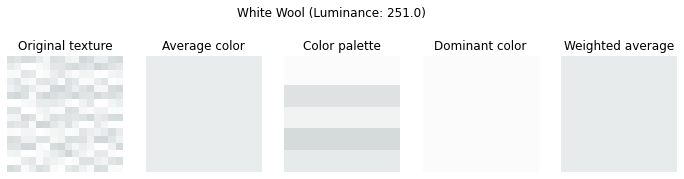

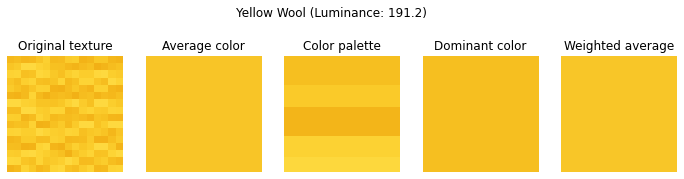

In [11]:

wool_blocks_list = sorted(wool_blocks_list)
print(wool_blocks_list)
for file_name in wool_blocks_list:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    block_tuple = show_images(file_name, img_array, avg_patch, dom_patch, palette_patch,
                              weighted_avg_patch)

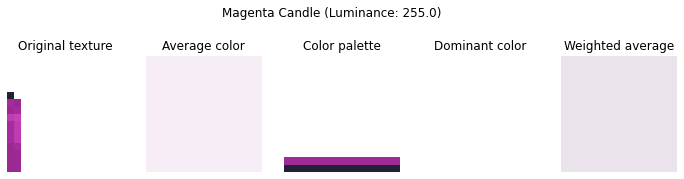

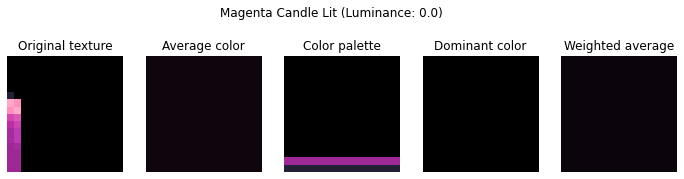

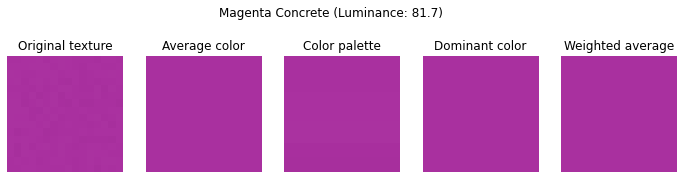

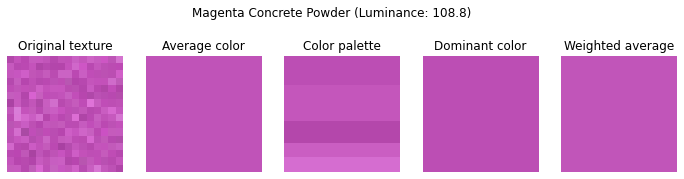

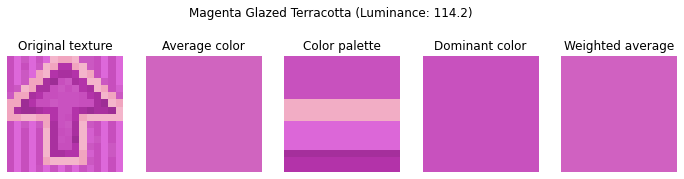

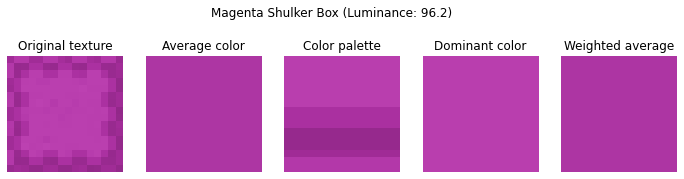

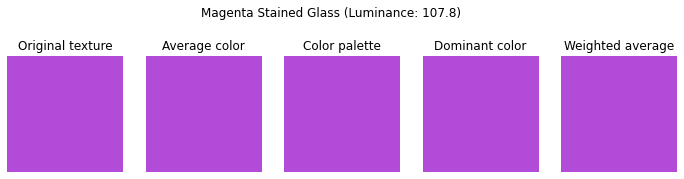

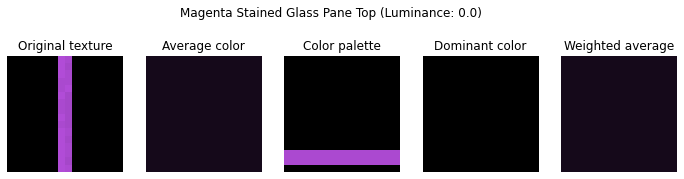

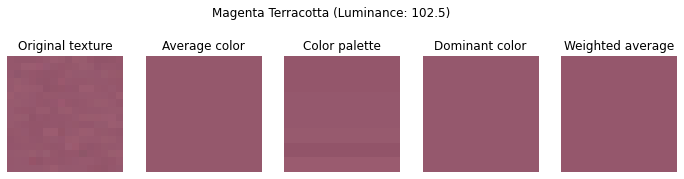

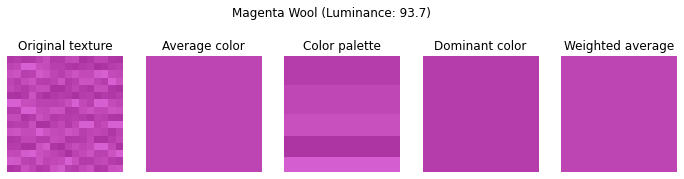

In [12]:

for file_name in [key for key in WEIGHTED_AVERAGE_DICT.keys() if 'magenta' in key.lower()]:
    (img_array, avg_patch, dom_patch, palette_patch,
     weighted_avg_patch) = get_patches(textures_dir, file_name, AVERAGE_DICT, DOMINANT_DICT,
                                       WEIGHTED_AVERAGE_DICT)
    block_tuple = show_images(file_name, img_array, avg_patch, dom_patch, palette_patch,
                              weighted_avg_patch)